<a href="https://colab.research.google.com/github/AkHiLdEvGoD/DeepLearning-codes/blob/main/Cat_vs_Dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization,Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
path = kagglehub.dataset_download("salader/dogs-vs-cats")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
    shuffle=True,
)

val_ds =  keras.utils.image_dataset_from_directory(
    directory = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
    shuffle=True,
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
def normalize(img,label):
  img = tf.cast(img/255. , tf.float32)
  return img,label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

In [26]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3),kernel_regularizer=l2(0.00001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=l2(0.00001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=l2(0.00001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=l2(0.00001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.00001)))
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.00001)))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.00001)))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=l2(0.00001)))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 6,823,361 (26.03 MB)

 Trainable params: 6,822,401 (26.03 MB)

 Non-trainable params: 960 (3.75 KB)

In [27]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history = model.fit(train_ds,epochs=10,validation_data=val_ds,callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.5765 - loss: 1.1192 - val_accuracy: 0.6418 - val_loss: 0.6408
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - accuracy: 0.7139 - loss: 0.5688 - val_accuracy: 0.6198 - val_loss: 1.0800
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.7774 - loss: 0.4904 - val_accuracy: 0.7622 - val_loss: 0.5288
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8496 - loss: 0.3695 - val_accuracy: 0.8440 - val_loss: 0.3753
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8937 - loss: 0.2792 - val_accuracy: 0.8610 - val_loss: 0.3627
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9267 - loss: 0.2191 - val_accuracy: 0.7910 - val_loss: 0.6765
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9519 - loss: 0.1700 - val_accuracy: 0.7812 - val_loss: 0.5723
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.9658 - loss: 0.1469 - 

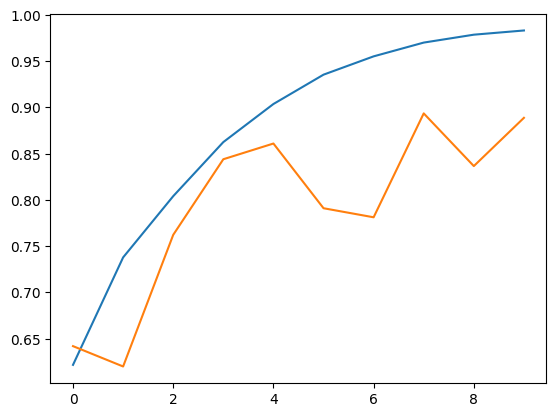

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

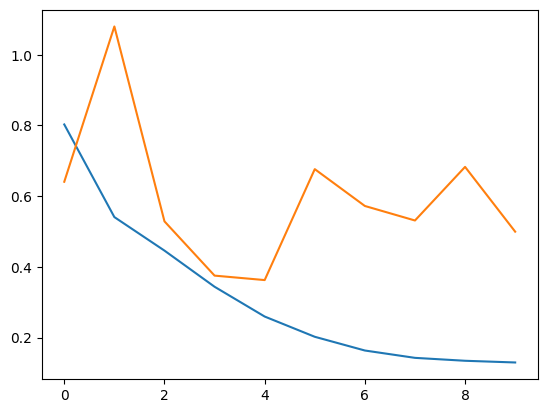

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [52]:
import cv2 as cv
cat1 = cv.imread('/content/cat1.jpg')
cat2 = cv.imread('/content/cat2.jpg')
cat3 = cv.imread('/content/cat3.jpg')
dog1 = cv.imread('/content/dog1.jpg')
dog2 = cv.imread('/content/dog2.jpg')
dog3 = cv.imread('/content/dog3.jpg')

In [53]:
cat1 = cv.resize(cat1,(256,256))
cat2 = cv.resize(cat2,(256,256))
cat3 = cv.resize(cat3,(256,256))
dog1 = cv.resize(dog1,(256,256))
dog2 = cv.resize(dog2,(256,256))
dog3 = cv.resize(dog3,(256,256))

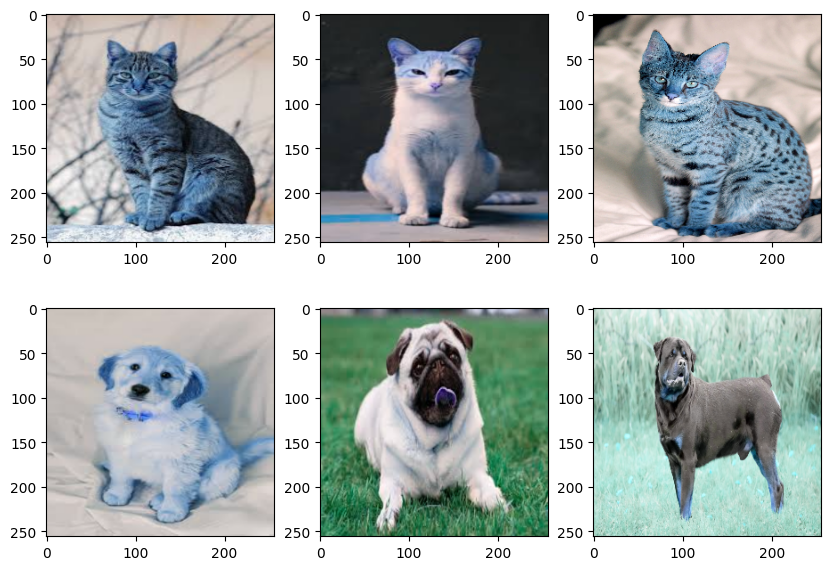

In [59]:
fig,ax = plt.subplots(2,3,figsize=(10,7))
ax[0][0].imshow(cat1)
ax[0][1].imshow(cat2)
ax[0][2].imshow(cat3)
ax[1][0].imshow(dog1)
ax[1][1].imshow(dog2)
ax[1][2].imshow(dog3)

In [55]:
print(model.predict(cat1.reshape((1,256,256,3))))
print(model.predict(cat2.reshape((1,256,256,3))))
print(model.predict(cat3.reshape((1,256,256,3))))
print(model.predict(dog1.reshape((1,256,256,3))))
print(model.predict(dog2.reshape((1,256,256,3))))
print(model.predict(dog3.reshape((1,256,256,3))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1.]]
